In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from matplotlib import rcParams
sns.set(style="darkgrid")

rcParams['figure.figsize'] = 12,6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
#df = pd.read_csv('/content/drive/MyDrive/Final Project KreditYuk/Stage 1/Training Data.csv')
data = pd.read_csv('Training Data.csv')
df = data

#  EDA, Preprocessing and Feature Engineering

**1. Missing value detection**

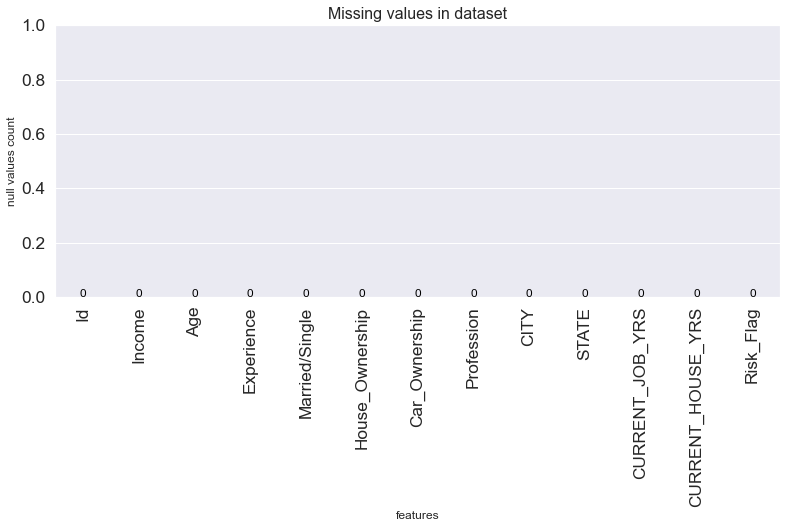

In [3]:
null_df = df.isnull().sum().reset_index()
plt.figure(figsize=(13,5))
ax = sns.barplot(null_df["index"], null_df[0], palette="husl")
ax.set(xlabel="features", ylabel="null values count")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
ax.set_ylim(0,1)
[ax.text(index,value[1],value[1], color='black', ha="center") for index,value in enumerate(null_df.values)]
ax.set_title('Missing values in dataset', fontsize=16)
plt.show()

In [4]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

The dataset doesn't contain any missing value or empty string. So we can continue to explore.

**2. Handle Data duplicated**

In [5]:
df.duplicated().sum()

0

The dataset doesn't contain any duplicate on row. So we can continue to explore.

**3. Descriptive Statistic**

In [6]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [8]:
nums = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
cats = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

In [9]:
df[nums].describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000


In [10]:
for col in cats:
    print(f'''Value count kolom {col}: ''')
    print(df[col].value_counts())
    print()

Value count kolom Married/Single: 
single     226272
married     25728
Name: Married/Single, dtype: int64

Value count kolom House_Ownership: 
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

Value count kolom Car_Ownership: 
no     176000
yes     76000
Name: Car_Ownership, dtype: int64

Value count kolom Profession: 
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant            

1. Dataset terdiri dari 252000 baris.
2. Terdapat 5 kolom berisi data numeric, dan 6 kolom berisi data categorical
3. Tidak ada null/missing values pada semua kolom.
4. Tidak ada duplicate data antar baris.
5. Semua kolom numerikal memliki perbedaan nilai yang tidak terlalu jauh antara mean dan mediannya.
6. Kolom Profession, CITY, dan STATE memiliki banyak unique distinct values (high cardinality).
7. Frekuensi dari nilai yang paling umum pada kolom Married/Single, House_Ownership, dan Car_Ownership terlalu timpang (90% dari jumlah data).

**4. Univariate Analysis**

In [11]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

4.1 Income

In [12]:
print(f"Unique Value of feature Age is: {df['Income'].nunique()}")
df["Income"].describe()

Unique Value of feature Age is: 41920


count    2.520000e+05
mean     4.997117e+06
std      2.878311e+06
min      1.031000e+04
25%      2.503015e+06
50%      5.000694e+06
75%      7.477502e+06
max      9.999938e+06
Name: Income, dtype: float64

Text(0.5, 0.98, 'Income Distribution')

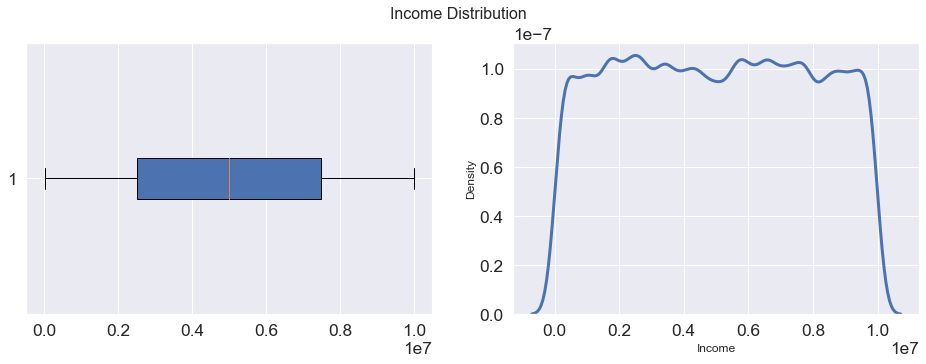

In [13]:
fig, ax = plt.subplots(1,2, b)
sns.kdeplot(df['Income'],data=df)
ax[0].boxplot(df['Income'],data=df,vert=0,patch_artist=True)
fig.suptitle('Income Distribution', fontsize=16)

observation :
1. In data income we don't see the outliers
2. Data spread is very wide, so we need to standarized in future

4.2 Age

In [14]:
print(f"Unique Value of feature Age is: {df['Age'].nunique()}")
df["Age"].describe()

Unique Value of feature Age is: 59


count    252000.000000
mean         49.954071
std          17.063855
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Age, dtype: float64

Text(0.5, 0.98, 'Age Distribution')

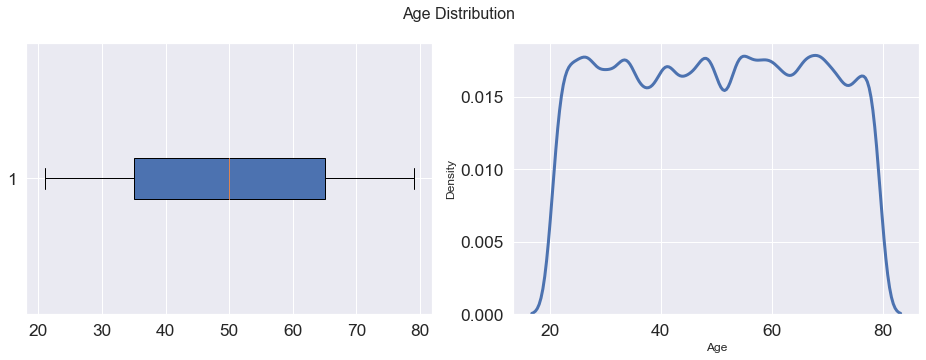

In [15]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.kdeplot(df['Age'],data=df)
ax[0].boxplot(df['Age'],data=df,vert=0,patch_artist=True)
fig.suptitle('Age Distribution', fontsize=16)

We need to categorize the age to see comparison the customers by age groups. 
Age categorize refers to Dyussenbayev, A. (2017). Age Periods Of Human Life. Advances in Social Sciences Research Journal.
<img src="image_age.png" width=300 height=300 />

In [16]:
df['Age_Cats'] = pd.cut(df.Age,
                 [0, 25, 44, 60, 75, 90],
                 labels=['teen','young age','middle age','eldery age','senile age'])
data_age = df.groupby('Age_Cats').agg({'Id':'count'}).reset_index()
data_age['Percentage'] = data_age['Id'].apply(lambda x:round(x/data_age['Id'].sum()*100,2))

In [280]:
data_age.head()

,Age_Cats,Id,Percentage
0,teen,21826,8.66
1,young age,80112,31.79
2,middle age,69250,27.48
3,eldery age,63351,25.14
4,senile age,17461,6.93


Text(0.5, 1.0, 'Comparison of Customers by Age (%)')

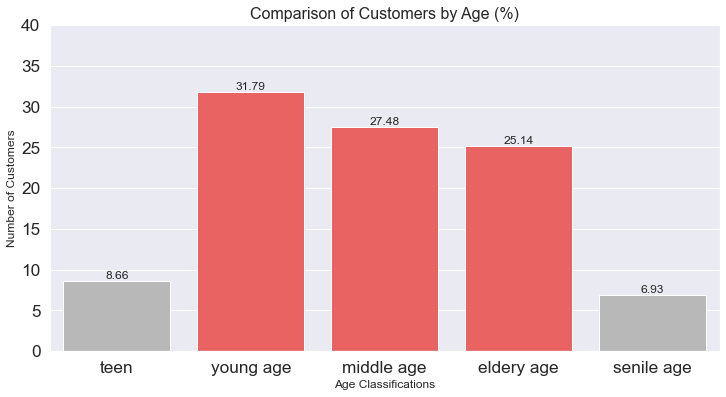

In [17]:
flatui = ["#b8b8b8", "#ff4d4d", "#ff4d4d", "#ff4d4d", "#b8b8b8"]
sns.set_palette(flatui)

ax = sns.barplot(x='Age_Cats',y='Percentage',data=data_age,  palette =sns.color_palette())
ax.bar_label(ax.containers[0])
ax.set_ylim(0,40)
plt.ylabel('Number of Customers')
plt.xlabel('Age Classifications')
plt.title('Comparison of Customers by Age (%)', fontsize=16)

observation :
1. The loan customers have age range from 21 to 79
2. We have no outliers 
3. Majority of customers (84.41%) from Young age, Middle age, and Eldery age.

4.3 Experience

In [18]:
print(f"Unique Value of feature Age is: {df['Experience'].nunique()}")
df["Experience"].describe()

Unique Value of feature Age is: 21


count    252000.000000
mean         10.084437
std           6.002590
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Experience, dtype: float64

Text(0.5, 0.98, 'Experience Distribution')

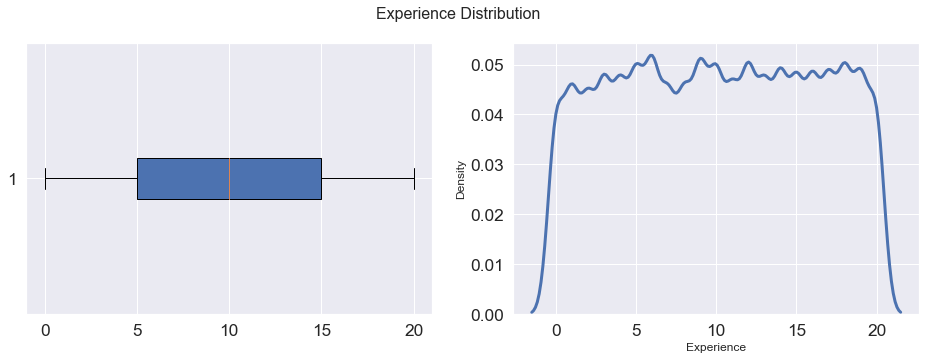

In [19]:
sns.set_palette("deep")
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.kdeplot(df['Experience'],data=df)
ax[0].boxplot(df['Experience'],data=df,vert=0,patch_artist=True)
fig.suptitle('Experience Distribution', fontsize=16)

4.4 Married/Single

In [20]:
print(f"Unique Value of feature Age is: {df['Married/Single'].nunique()}")
df["Married/Single"].describe()

Unique Value of feature Age is: 2


count     252000
unique         2
top       single
freq      226272
Name: Married/Single, dtype: object

In [21]:
marital = df.groupby('Married/Single').agg({'Id':'count'}).reset_index()
marital['percentage']=marital['Id'].apply(lambda x: round(x/marital['Id'].sum()*100,2))
marital

,Married/Single,Id,percentage
0,married,25728,10.21
1,single,226272,89.79


Text(0.5, 1.0, 'Comparison of Customers by Marital Status (%)')

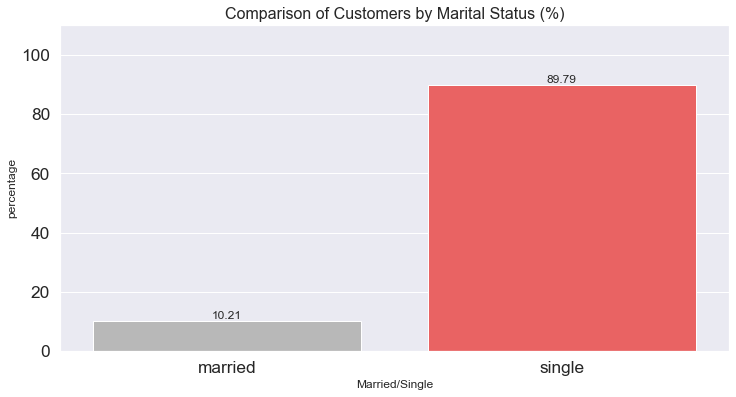

In [22]:
ddd = ["#b8b8b8", "#ff4d4d"]
sns.set_palette(ddd)

ax = sns.barplot(x='Married/Single',y='percentage',data=marital, palette =sns.color_palette())
ax.bar_label(ax.containers[0])
ax.set_ylim(0,110)
plt.title('Comparison of Customers by Marital Status (%)', fontsize=16)

observation :
1. Risk_flag has data imbalance

4.5 House_Ownership

In [23]:
print(f"Unique Value of feature Age is: {df['House_Ownership'].nunique()}")
df["House_Ownership"].describe()

Unique Value of feature Age is: 3


count     252000
unique         3
top       rented
freq      231898
Name: House_Ownership, dtype: object

In [24]:
house = df.groupby('House_Ownership').agg({'Id':'count'}).reset_index()
house['percentage']=house['Id'].apply(lambda x: round(x/house['Id'].sum()*100,2))
house

,House_Ownership,Id,percentage
0,norent_noown,7184,2.85
1,owned,12918,5.13
2,rented,231898,92.02


Text(0.5, 1.0, 'Comparison of Customers by House Ownership Status (%)')

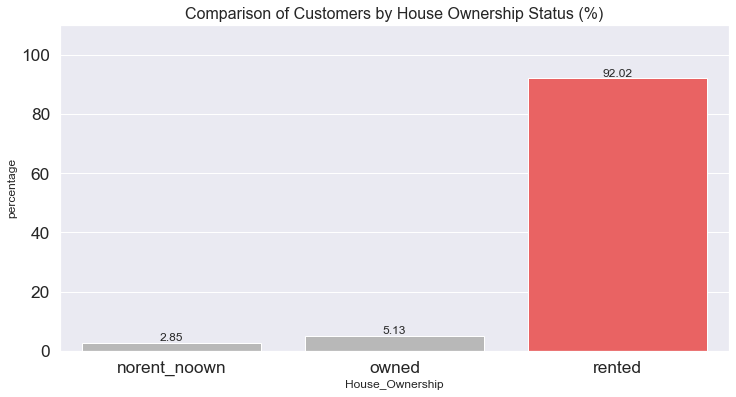

In [25]:
ddd = ["#b8b8b8", "#b8b8b8", "#ff4d4d"]
sns.set_palette(ddd)

ax = sns.barplot(x='House_Ownership',y='percentage',data=house, palette =sns.color_palette())
ax.bar_label(ax.containers[0])
ax.set_ylim(0,110)
plt.title('Comparison of Customers by House Ownership Status (%)', fontsize=16)

observation :
1. Risk_flag has data imbalance

4.5 Car_Ownership

In [26]:
print(f"Unique Value of feature Age is: {df['Car_Ownership'].nunique()}")
df["Car_Ownership"].describe()

Unique Value of feature Age is: 2


count     252000
unique         2
top           no
freq      176000
Name: Car_Ownership, dtype: object

In [27]:
car = df.groupby('Car_Ownership').agg({'Id':'count'}).reset_index()
car['percentage']=car['Id'].apply(lambda x: round(x/car['Id'].sum()*100,2))
car

,Car_Ownership,Id,percentage
0,no,176000,69.84
1,yes,76000,30.16


Text(0.5, 1.0, 'Comparison of Customers by House Ownership Status (%)')

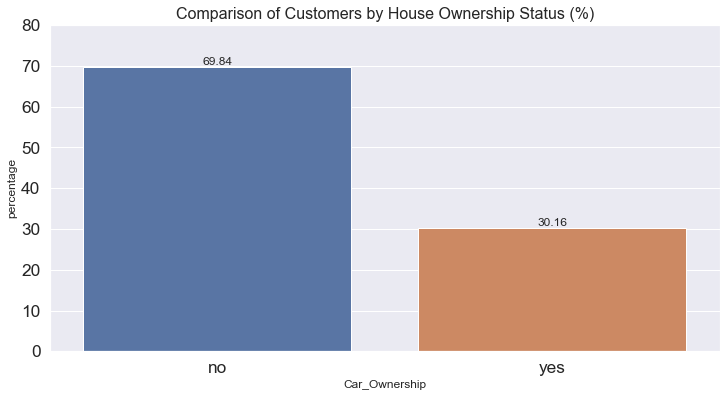

In [28]:
sns.set_palette('deep')
ax = sns.barplot(x='Car_Ownership',y='percentage',data=car, palette =sns.color_palette())
ax.bar_label(ax.containers[0])
ax.set_ylim(0,80)
plt.title('Comparison of Customers by House Ownership Status (%)', fontsize=16)

4.6 Profession

In [29]:
print(f"Unique Value of feature Age is: {df['Profession'].nunique()}")
df["Profession"].describe()

Unique Value of feature Age is: 51


count        252000
unique           51
top       Physician
freq           5957
Name: Profession, dtype: object

In [30]:
Profession = df.groupby('Profession').agg({'Id':'count'}).reset_index()
Profession['percentage']=Profession['Id'].apply(lambda x: round(x/Profession['Id'].sum()*100,2))
Profession = Profession.sort_values('percentage', ascending=0).reset_index()
Profession.drop('index',axis=1).head()

,Profession,Id,percentage
0,Physician,5957,2.36
1,Statistician,5806,2.30
2,Web_designer,5397,2.14
3,Psychologist,5390,2.14
4,Computer_hardware_engineer,5372,2.13


4.7 CITY

In [31]:
print(f"Unique Value of feature Age is: {df['CITY'].nunique()}")
df["CITY"].describe()

Unique Value of feature Age is: 317


count            252000
unique              317
top       Vijayanagaram
freq               1259
Name: CITY, dtype: object

In [32]:
city = df.groupby('CITY').agg({'Id':'count'}).reset_index()
city['percentage']=city['Id'].apply(lambda x: round(x/city['Id'].sum()*100,2))
city = city.sort_values('percentage', ascending=0).reset_index()
city.drop('index', axis=1, inplace=True)
city.head()

,CITY,Id,percentage
0,Vijayanagaram,1259,0.50
1,Bhopal,1208,0.48
2,Bulandshahr,1185,0.47
3,Vijayawada,1172,0.47
4,Saharsa[29],1180,0.47


There're unnecessary character on City, so we fix it.

In [33]:
# handling unnecessary character
df['CITY'] = df['CITY'].map(lambda x: x.split("[")[0] if "[" in x else x)
df['CITY'].head().reset_index()

,index,CITY
0,0,Rewa
1,1,Parbhani
2,2,Alappuzha
3,3,Bhubaneswar
4,4,Tiruchirappalli


4.8 STATE

In [34]:
print(f"Unique Value of feature Age is: {df['STATE'].nunique()}")
df["STATE"].describe()

Unique Value of feature Age is: 29


count            252000
unique               29
top       Uttar_Pradesh
freq              28400
Name: STATE, dtype: object

In [35]:
state = df.groupby('STATE').agg({'Id':'count'}).reset_index()
state['percentage']=state['Id'].apply(lambda x: round(x/state['Id'].sum()*100,2))
state = state.sort_values('percentage', ascending=0).reset_index()
state.drop('index',axis=1).head()

,STATE,Id,percentage
0,Uttar_Pradesh,28400,11.27
1,Maharashtra,25562,10.14
2,Andhra_Pradesh,25297,10.04
3,West_Bengal,23483,9.32
4,Bihar,19780,7.85


4.9 CURRENT_JOB_YRS

In [36]:
print(f"Unique Value of feature Age is: {df['CURRENT_JOB_YRS'].nunique()}")
df["CURRENT_JOB_YRS"].describe()

Unique Value of feature Age is: 15


count    252000.000000
mean          6.333877
std           3.647053
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: CURRENT_JOB_YRS, dtype: float64

Text(0.5, 0.98, 'Current Job Years Distribution')

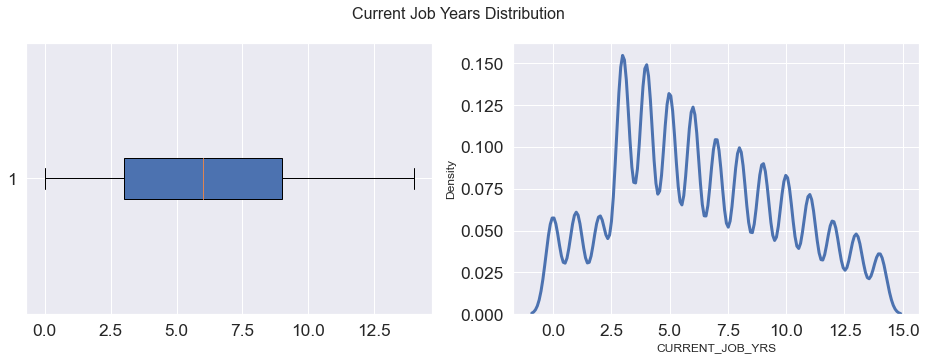

In [37]:
sns.set_palette("deep")
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.kdeplot(df['CURRENT_JOB_YRS'],data=df)
ax[0].boxplot(df['CURRENT_JOB_YRS'],data=df,vert=0,patch_artist=True)
fig.suptitle('Current Job Years Distribution', fontsize=16)

4.10 CURRENT_HOUSE_YRS

In [38]:
print(f"Unique Value of feature Age is: {df['CURRENT_HOUSE_YRS'].nunique()}")
df["CURRENT_HOUSE_YRS"].describe()

Unique Value of feature Age is: 5


count    252000.000000
mean         11.997794
std           1.399037
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: CURRENT_HOUSE_YRS, dtype: float64

Text(0.5, 0.98, 'Current House Years Distribution')

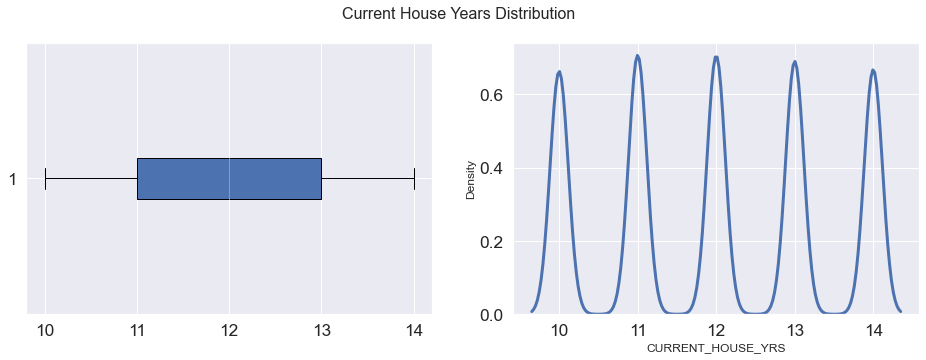

In [39]:
sns.set_palette("deep")
fig, ax = plt.subplots(1,2, figsize=(16,5))
sns.kdeplot(df['CURRENT_HOUSE_YRS'],data=df)
ax[0].boxplot(df['CURRENT_HOUSE_YRS'],data=df,vert=0,patch_artist=True)
fig.suptitle('Current House Years Distribution', fontsize=16)

4.11 Risk_Flag

In [40]:
risk_flag = df.groupby('Risk_Flag').agg({'Id':'count'}).reset_index()
risk_flag['percentage']=risk_flag['Id'].apply(lambda x: round(x/risk_flag['Id'].sum()*100,2))
risk_flag

,Risk_Flag,Id,percentage
0,0,221004,87.7
1,1,30996,12.3


Text(0.5, 1.0, 'Comparison of Customers by House Ownership Status (%)')

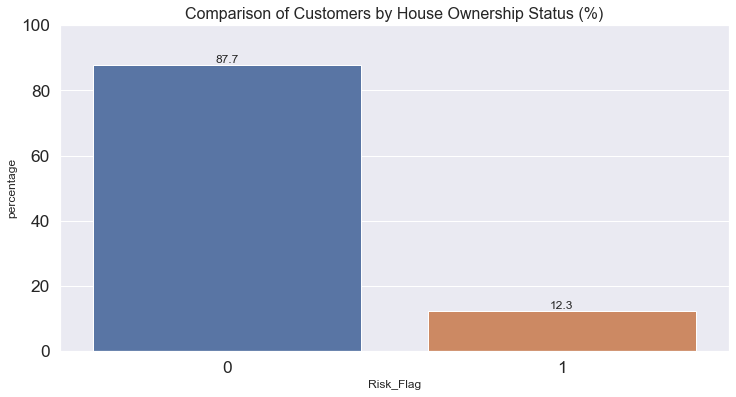

In [41]:
sns.set_palette('deep')
ax = sns.barplot(x='Risk_Flag',y='percentage',data=risk_flag, palette =sns.color_palette())
ax.bar_label(ax.containers[0])
ax.set_ylim(0,100)
plt.title('Comparison of Customers by House Ownership Status (%)', fontsize=16)

observation :
1. Risk_flag has data imbalance

**5. Multivariate Analysis**

In [42]:
df.corr()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<AxesSubplot:>

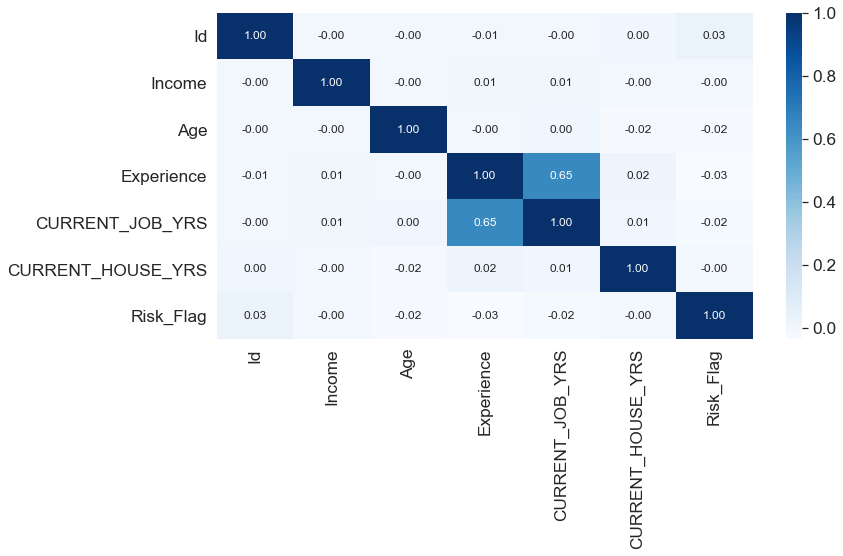

In [43]:
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**6. Features Selection**

In [44]:
scaled_features = df.drop(labels=['Id','Age_Cats'], axis=1)
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,3,14,1


**7. Features Encoding**

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaled_features.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [47]:
col_std = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
features = scaled_features[col_std]

# Use scaler of choice; here Standard scaler is used
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_features[col_std] = features
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0
1,0.895457,-0.583344,-0.014067,single,rented,no,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0
2,-0.349269,0.940348,-1.013637,married,rented,no,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0
3,0.437526,-0.524740,-1.346827,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1
4,0.268128,-0.173119,0.152528,single,rented,no,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1


Label Encoding

In [48]:
mapping_Married_Single = {
    'single' : 0,
    'married' : 1
}
mapping_Car_Ownership = {
    'no' : 0,
    'yes' : 1
}

scaled_features['Married/Single'] = scaled_features['Married/Single'].map(mapping_Married_Single)
scaled_features['Car_Ownership'] = scaled_features['Car_Ownership'].map(mapping_Car_Ownership)
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,-1.283145,-1.579604,-1.180232,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0
1,0.895457,-0.583344,-0.014067,0,rented,0,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0
2,-0.349269,0.940348,-1.013637,1,rented,0,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0
3,0.437526,-0.524740,-1.346827,0,rented,1,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1
4,0.268128,-0.173119,0.152528,0,rented,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1


One Hot Encoding

In [49]:
for cats in ['House_Ownership']:
    onehots = pd.get_dummies(scaled_features[cats], prefix=cats)
    scaled_features = scaled_features.join(onehots)
scaled_features.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,-1.283145,-1.579604,-1.180232,0,rented,0,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0,0,0,1
1,0.895457,-0.583344,-0.014067,0,rented,0,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0,0,0,1
2,-0.349269,0.940348,-1.013637,1,rented,0,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0,0,0,1
3,0.437526,-0.524740,-1.346827,0,rented,1,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1,0,0,1
4,0.268128,-0.173119,0.152528,0,rented,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1,0,0,1


In [50]:
scaled_features.drop('House_Ownership', axis=1, inplace=True)

In [51]:
scaled_features.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented
0,-1.283145,-1.579604,-1.180232,0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,-0.914131,0.716356,0,0,0,1
1,0.895457,-0.583344,-0.014067,0,0,Software_Developer,Parbhani,Maharashtra,0.731036,0.716356,0,0,0,1
2,-0.349269,0.940348,-1.013637,1,0,Technical_writer,Alappuzha,Kerala,-0.639936,-1.427981,0,0,0,1
3,0.437526,-0.524740,-1.346827,0,1,Software_Developer,Bhubaneswar,Odisha,-1.188325,0.001577,1,0,0,1
4,0.268128,-0.173119,0.152528,0,0,Civil_servant,Tiruchirappalli,Tamil_Nadu,-0.914131,1.431135,1,0,0,1


Frecuency Encoding

In [52]:
FE_profession = scaled_features.groupby('Profession').size()/len(scaled_features)
scaled_features.loc[:,'Profession_FE'] = scaled_features['Profession'].map(FE_profession)

FE_city = scaled_features.groupby('CITY').size()/len(scaled_features)
scaled_features.loc[:,'CITY_FE'] = scaled_features['CITY'].map(FE_city)

FE_state = scaled_features.groupby('STATE').size()/len(scaled_features)
scaled_features.loc[:,'STATE_FE'] = scaled_features['STATE'].map(FE_state)

In [53]:
scaled_features.drop(['Profession','CITY','STATE'], axis=1, inplace=True)
scaled_features.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
0,-1.283145,-1.579604,-1.180232,0,0,-0.914131,0.716356,0,0,0,1,0.020702,0.003167,0.056040
1,0.895457,-0.583344,-0.014067,0,0,0.731036,0.716356,0,0,0,1,0.020052,0.003369,0.101437
2,-0.349269,0.940348,-1.013637,1,0,-0.639936,-1.427981,0,0,0,1,0.020615,0.002730,0.023036
3,0.437526,-0.524740,-1.346827,0,1,-1.188325,0.001577,1,0,0,1,0.020052,0.002409,0.018484
4,0.268128,-0.173119,0.152528,0,0,-0.914131,1.431135,1,0,0,1,0.017512,0.003210,0.065623


**8. Machine Learning**

In [54]:
#test function
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_classification(model, xtrain, ytrain, xtest, ytest):
    ypred = model.predict(xtest)
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, ypred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, ypred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, ypred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, ypred))
    
    y_pred_proba = model.predict_proba(xtest)
    print("AUC: %.2f" % roc_auc_score(ytest, y_pred_proba[:, 1]))

In [55]:
X = scaled_features.drop('Risk_Flag', axis=1)
y = df['Risk_Flag']

In [56]:
X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
0,-1.283145,-1.579604,-1.180232,0,0,-0.914131,0.716356,0,0,1,0.020702,0.003167,0.056040
1,0.895457,-0.583344,-0.014067,0,0,0.731036,0.716356,0,0,1,0.020052,0.003369,0.101437
2,-0.349269,0.940348,-1.013637,1,0,-0.639936,-1.427981,0,0,1,0.020615,0.002730,0.023036
3,0.437526,-0.524740,-1.346827,0,1,-1.188325,0.001577,0,0,1,0.020052,0.002409,0.018484
4,0.268128,-0.173119,0.152528,0,0,-0.914131,1.431135,0,0,1,0.017512,0.003210,0.065623


Split data train & test before under/over sampling

In [57]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7, random_state = 42)

Handling Data Imbalance

In [58]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_under, y_under = under_sampling.RandomUnderSampler('all').fit_resample(X_train, y_train)
X_over, y_over = over_sampling.RandomOverSampler('all').fit_resample(X_train, y_train)
X_smote, y_smote = over_sampling.SMOTE('all').fit_resample(X_train, y_train)

Handling data imbalance & Split

In [146]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

X_sampling, y_sampling = over_sampling.SMOTE('all').fit_resample(X, y)

In [147]:
from sklearn.model_selection import train_test_split 
X_smote, X_test, y_smote, y_test = train_test_split(X_sampling, 
                                                    y_sampling, 
                                                    test_size = 0.3, 
                                                    train_size = 0.7, 
                                                    random_state = 42)

In [148]:
y_train.value_counts(), y_smote.value_counts()

(0    154675
 1     21725
 Name: Risk_Flag, dtype: int64,
 1    154920
 0    154485
 Name: Risk_Flag, dtype: int64)

Modeling

8.1 Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_smote, y_smote)

LogisticRegression(random_state=42)

In [150]:
eval_classification(model_lr, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.55
Precision (Test Set): 0.54
Recall (Test Set): 0.60
F1-Score (Test Set): 0.57
AUC: 0.56


8.2 Decision Tree

In [151]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

In [152]:
eval_classification(model_dt, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
AUC: 0.92


In [153]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model_dt_hyper = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='precision')
model_dt_hyper.fit(X_smote, y_smote)

# Predict & Evaluation
y_pred = model_dt_hyper.predict(X_test)#Check performa dari model
eval_classification(model_dt_hyper, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.91
Precision (Test Set): 0.88
Recall (Test Set): 0.95
F1-Score (Test Set): 0.91
AUC: 0.93


8.3 Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
model_rf = DecisionTreeClassifier(random_state=42)
model_rf.fit(X_smote,y_smote)

eval_classification(model_rf, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.88
Recall (Test Set): 0.96
F1-Score (Test Set): 0.92
AUC: 0.92


8.4 XGBoost

In [155]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_smote,y_smote)

eval_classification(model_xg, X_smote, y_smote, X_test, y_test)

[17:10:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.91
Precision (Test Set): 0.89
Recall (Test Set): 0.93
F1-Score (Test Set): 0.91
AUC: 0.95


8.5 Lightgbm

In [156]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_smote, y_smote)
eval_classification(lgbm, X_smote, y_smote, X_test, y_test)

Accuracy (Test Set): 0.85
Precision (Test Set): 0.85
Recall (Test Set): 0.85
F1-Score (Test Set): 0.85
AUC: 0.92


8.5 CatBoost Classifier

In [157]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf.fit(X_smote, y_smote)
eval_classification(clf, X_smote, y_smote, X_test, y_test)

Learning rate set to 0.119231
0:	learn: 0.6876398	total: 63.9ms	remaining: 1m 3s
1:	learn: 0.6814747	total: 91.5ms	remaining: 45.7s
2:	learn: 0.6777431	total: 111ms	remaining: 37s
3:	learn: 0.6742001	total: 138ms	remaining: 34.4s
4:	learn: 0.6721135	total: 168ms	remaining: 33.4s
5:	learn: 0.6693946	total: 188ms	remaining: 31.2s
6:	learn: 0.6671842	total: 205ms	remaining: 29.1s
7:	learn: 0.6637553	total: 222ms	remaining: 27.5s
8:	learn: 0.6595860	total: 241ms	remaining: 26.5s
9:	learn: 0.6578780	total: 259ms	remaining: 25.7s
10:	learn: 0.6563277	total: 277ms	remaining: 24.9s
11:	learn: 0.6546159	total: 294ms	remaining: 24.2s
12:	learn: 0.6530051	total: 313ms	remaining: 23.8s
13:	learn: 0.6507032	total: 331ms	remaining: 23.3s
14:	learn: 0.6491911	total: 357ms	remaining: 23.4s
15:	learn: 0.6460185	total: 378ms	remaining: 23.2s
16:	learn: 0.6445191	total: 398ms	remaining: 23s
17:	learn: 0.6434208	total: 417ms	remaining: 22.8s
18:	learn: 0.6419747	total: 438ms	remaining: 22.6s
19:	learn: 0.

163:	learn: 0.4901023	total: 3.3s	remaining: 16.8s
164:	learn: 0.4896446	total: 3.32s	remaining: 16.8s
165:	learn: 0.4891494	total: 3.34s	remaining: 16.8s
166:	learn: 0.4885560	total: 3.36s	remaining: 16.8s
167:	learn: 0.4880208	total: 3.38s	remaining: 16.7s
168:	learn: 0.4874153	total: 3.4s	remaining: 16.7s
169:	learn: 0.4868236	total: 3.42s	remaining: 16.7s
170:	learn: 0.4860985	total: 3.44s	remaining: 16.7s
171:	learn: 0.4854817	total: 3.46s	remaining: 16.6s
172:	learn: 0.4846901	total: 3.48s	remaining: 16.6s
173:	learn: 0.4839628	total: 3.5s	remaining: 16.6s
174:	learn: 0.4831644	total: 3.52s	remaining: 16.6s
175:	learn: 0.4825287	total: 3.54s	remaining: 16.6s
176:	learn: 0.4820154	total: 3.56s	remaining: 16.6s
177:	learn: 0.4813655	total: 3.58s	remaining: 16.5s
178:	learn: 0.4807287	total: 3.6s	remaining: 16.5s
179:	learn: 0.4799961	total: 3.62s	remaining: 16.5s
180:	learn: 0.4792914	total: 3.65s	remaining: 16.5s
181:	learn: 0.4786138	total: 3.67s	remaining: 16.5s
182:	learn: 0.47

330:	learn: 0.3995523	total: 6.86s	remaining: 13.9s
331:	learn: 0.3992311	total: 6.88s	remaining: 13.8s
332:	learn: 0.3989060	total: 6.9s	remaining: 13.8s
333:	learn: 0.3985041	total: 6.92s	remaining: 13.8s
334:	learn: 0.3981676	total: 6.94s	remaining: 13.8s
335:	learn: 0.3977591	total: 6.96s	remaining: 13.8s
336:	learn: 0.3974162	total: 6.98s	remaining: 13.7s
337:	learn: 0.3969330	total: 7s	remaining: 13.7s
338:	learn: 0.3963067	total: 7.02s	remaining: 13.7s
339:	learn: 0.3957905	total: 7.04s	remaining: 13.7s
340:	learn: 0.3953484	total: 7.05s	remaining: 13.6s
341:	learn: 0.3949827	total: 7.07s	remaining: 13.6s
342:	learn: 0.3945989	total: 7.09s	remaining: 13.6s
343:	learn: 0.3940537	total: 7.11s	remaining: 13.6s
344:	learn: 0.3935944	total: 7.13s	remaining: 13.5s
345:	learn: 0.3932727	total: 7.14s	remaining: 13.5s
346:	learn: 0.3929160	total: 7.16s	remaining: 13.5s
347:	learn: 0.3924465	total: 7.18s	remaining: 13.5s
348:	learn: 0.3921439	total: 7.2s	remaining: 13.4s
349:	learn: 0.391

490:	learn: 0.3434527	total: 10.2s	remaining: 10.6s
491:	learn: 0.3431535	total: 10.2s	remaining: 10.6s
492:	learn: 0.3427009	total: 10.3s	remaining: 10.5s
493:	learn: 0.3423534	total: 10.3s	remaining: 10.5s
494:	learn: 0.3420348	total: 10.3s	remaining: 10.5s
495:	learn: 0.3416888	total: 10.3s	remaining: 10.5s
496:	learn: 0.3414460	total: 10.3s	remaining: 10.5s
497:	learn: 0.3411630	total: 10.4s	remaining: 10.5s
498:	learn: 0.3408087	total: 10.4s	remaining: 10.4s
499:	learn: 0.3404296	total: 10.4s	remaining: 10.4s
500:	learn: 0.3400493	total: 10.4s	remaining: 10.4s
501:	learn: 0.3398063	total: 10.5s	remaining: 10.4s
502:	learn: 0.3394527	total: 10.5s	remaining: 10.4s
503:	learn: 0.3391437	total: 10.5s	remaining: 10.3s
504:	learn: 0.3388316	total: 10.5s	remaining: 10.3s
505:	learn: 0.3384906	total: 10.6s	remaining: 10.3s
506:	learn: 0.3382885	total: 10.6s	remaining: 10.3s
507:	learn: 0.3379725	total: 10.6s	remaining: 10.3s
508:	learn: 0.3376495	total: 10.6s	remaining: 10.3s
509:	learn: 

650:	learn: 0.3053717	total: 15.4s	remaining: 8.27s
651:	learn: 0.3051723	total: 15.5s	remaining: 8.25s
652:	learn: 0.3048107	total: 15.5s	remaining: 8.23s
653:	learn: 0.3047302	total: 15.5s	remaining: 8.2s
654:	learn: 0.3046482	total: 15.5s	remaining: 8.18s
655:	learn: 0.3043692	total: 15.6s	remaining: 8.16s
656:	learn: 0.3041700	total: 15.6s	remaining: 8.14s
657:	learn: 0.3039983	total: 15.6s	remaining: 8.12s
658:	learn: 0.3038395	total: 15.6s	remaining: 8.09s
659:	learn: 0.3036198	total: 15.7s	remaining: 8.07s
660:	learn: 0.3034226	total: 15.7s	remaining: 8.04s
661:	learn: 0.3031598	total: 15.7s	remaining: 8.02s
662:	learn: 0.3029740	total: 15.7s	remaining: 8s
663:	learn: 0.3028355	total: 15.8s	remaining: 7.97s
664:	learn: 0.3026776	total: 15.8s	remaining: 7.95s
665:	learn: 0.3024742	total: 15.8s	remaining: 7.92s
666:	learn: 0.3023331	total: 15.8s	remaining: 7.89s
667:	learn: 0.3021613	total: 15.8s	remaining: 7.87s
668:	learn: 0.3018503	total: 15.9s	remaining: 7.84s
669:	learn: 0.30

819:	learn: 0.2772263	total: 19.6s	remaining: 4.31s
820:	learn: 0.2770872	total: 19.7s	remaining: 4.29s
821:	learn: 0.2769623	total: 19.7s	remaining: 4.26s
822:	learn: 0.2768574	total: 19.7s	remaining: 4.24s
823:	learn: 0.2767043	total: 19.7s	remaining: 4.21s
824:	learn: 0.2766040	total: 19.7s	remaining: 4.19s
825:	learn: 0.2764248	total: 19.8s	remaining: 4.16s
826:	learn: 0.2762250	total: 19.8s	remaining: 4.14s
827:	learn: 0.2761190	total: 19.8s	remaining: 4.11s
828:	learn: 0.2760289	total: 19.8s	remaining: 4.09s
829:	learn: 0.2758685	total: 19.8s	remaining: 4.06s
830:	learn: 0.2756782	total: 19.9s	remaining: 4.04s
831:	learn: 0.2755196	total: 19.9s	remaining: 4.01s
832:	learn: 0.2754073	total: 19.9s	remaining: 3.99s
833:	learn: 0.2752370	total: 19.9s	remaining: 3.97s
834:	learn: 0.2751535	total: 20s	remaining: 3.94s
835:	learn: 0.2750219	total: 20s	remaining: 3.92s
836:	learn: 0.2748763	total: 20s	remaining: 3.9s
837:	learn: 0.2746791	total: 20s	remaining: 3.87s
838:	learn: 0.2745426

983:	learn: 0.2565428	total: 23.7s	remaining: 385ms
984:	learn: 0.2564801	total: 23.7s	remaining: 360ms
985:	learn: 0.2564238	total: 23.7s	remaining: 336ms
986:	learn: 0.2563127	total: 23.7s	remaining: 312ms
987:	learn: 0.2561908	total: 23.7s	remaining: 288ms
988:	learn: 0.2561141	total: 23.7s	remaining: 264ms
989:	learn: 0.2560140	total: 23.8s	remaining: 240ms
990:	learn: 0.2559320	total: 23.8s	remaining: 216ms
991:	learn: 0.2558654	total: 23.8s	remaining: 192ms
992:	learn: 0.2557520	total: 23.8s	remaining: 168ms
993:	learn: 0.2556200	total: 23.8s	remaining: 144ms
994:	learn: 0.2555580	total: 23.9s	remaining: 120ms
995:	learn: 0.2555039	total: 23.9s	remaining: 95.9ms
996:	learn: 0.2554313	total: 23.9s	remaining: 71.9ms
997:	learn: 0.2553259	total: 23.9s	remaining: 47.9ms
998:	learn: 0.2552407	total: 23.9s	remaining: 24ms
999:	learn: 0.2551509	total: 24s	remaining: 0us
Accuracy (Test Set): 0.94
Precision (Test Set): 0.91
Recall (Test Set): 0.96
F1-Score (Test Set): 0.94
AUC: 0.96


In [ ]:
eval_classification(clf, X_smote, y_smote, X_test, y_test)

**9.Features Important Catboost**

<AxesSubplot:xlabel='feature_importance', ylabel='feature_names'>

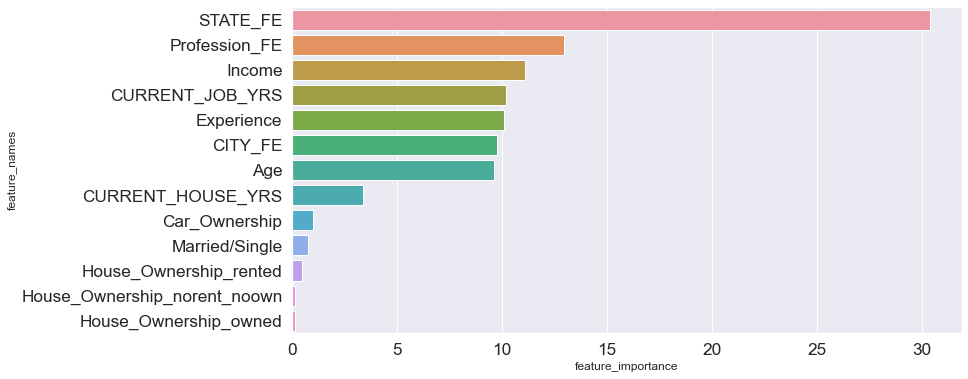

In [158]:
df_feature = pd.DataFrame({"feature_names":X_smote.keys(),
              "feature_importance":clf.get_feature_importance()})
df_feature = df_feature.sort_values(["feature_importance"],ascending=False)
sns.barplot(x='feature_importance', y='feature_names', data=df_feature, orient='h')

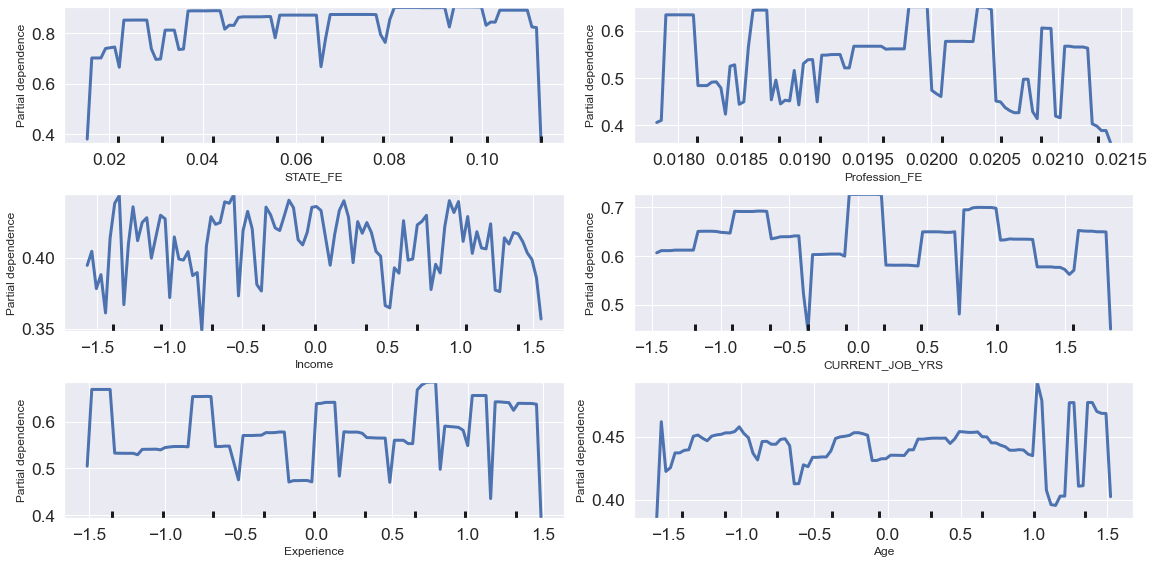

In [162]:
from sklearn.inspection import plot_partial_dependence

# We try to compare 4 features using partial dependence
fig, ax = plt.subplots(3,2, figsize=(16, 8))
plot_partial_dependence(clf, X_smote,["STATE_FE"], ax=ax[0,0])
plot_partial_dependence(clf, X_smote,["Profession_FE"], ax=ax[0,1])
plot_partial_dependence(clf, X_smote,["Income"], ax=ax[1,0])
plot_partial_dependence(clf, X_smote,["CURRENT_JOB_YRS"], ax=ax[1,1])
plot_partial_dependence(clf, X_smote,["Experience"], ax=ax[2,0])
plot_partial_dependence(clf, X_smote,["Age"], ax=ax[2,1])
plt.tight_layout()
plt.show()

In [170]:
from sklearn.metrics import confusion_matrix, classification_report

In [168]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [166]:
real_prediksi = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93     66519
           1       0.91      0.96      0.94     66084

    accuracy                           0.94    132603
   macro avg       0.94      0.94      0.94    132603
weighted avg       0.94      0.94      0.94    132603



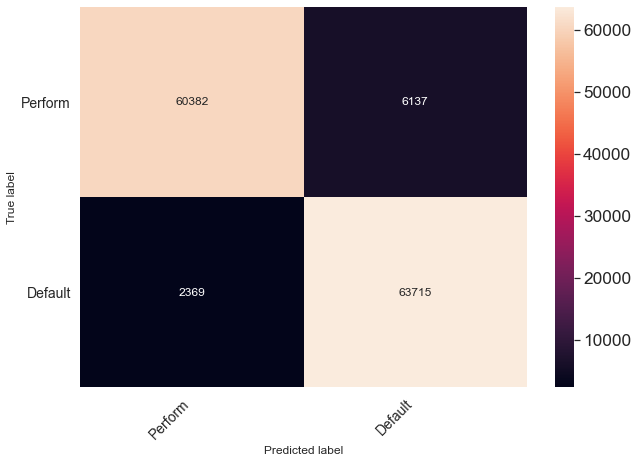

In [192]:
print_confusion_matrix(confusion_matrix(y_test, real_prediksi),class_names=["Perform", "Default"])
print(classification_report(y_test, real_prediksi))

In [201]:
y_test.value_counts()

0    66519
1    66084
Name: Risk_Flag, dtype: int64

In [185]:
gini_score = 0.96*2-1
gini_score

0.9199999999999999

In [229]:
clf_pred = clf.predict(X)
after = clf_pred.sum()

In [253]:
clf_pred.shape

(252000,)

In [230]:
before = y.sum()

In [231]:
after - before

13592

In [240]:
total_loss = df['Income']*10/100
total_loss = round(total_loss.sum(),2)
total_loss_avg = round(total_loss/252000,2)
total_loss_avg

499711.67

In [241]:
loss_before_ml = total_loss_avg * before
loss_after_ml = total_loss_avg * after
loss_after_ml, loss_before_ml

(22281143941.96, 15489062923.32)

In [256]:
data_pred = df
data_pred['predict'] = clf_pred

In [258]:
data_pred_before = data_pred[data_pred.Risk_Flag == 1]
data_pred_after = data_pred[data_pred.predict == 1]

In [ ]:
data_pred_before['Income']

In [276]:
total_loss_before = data_pred_before['Income']*10/100
total_loss_before = round(total_loss_before.sum(),2)
total_loss_before

15415423053.7

In [277]:
total_loss_after = data_pred_after['Income']*10/100
total_loss_after = round(total_loss_after.sum(),2)
total_loss_after

22026650853.4

In [279]:
22-15

7

In [270]:
data_pred_after['Income'].sum()

220266508534

In [271]:
data_pred_before['Income'].sum()

154154230537

In [278]:
data_pred['Risk_Flag'].sum(), data_pred['predict'].sum()

(30996, 44588)

In [224]:
X_test.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
21368,-1.567567,1.350573,0.818909,0,1,-0.914131,0.716356,0,1,0,0.019302,0.003139,0.112698
86007,0.188869,1.526383,1.485289,0,0,0.182647,0.001577,1,0,0,0.020004,0.003413,0.093187
430487,-0.321317,-0.176972,-1.598546,0,0,-1.602622,1.431135,0,0,1,0.019992,0.002793,0.056621
183601,-1.135162,-1.286586,-0.680447,1,1,-0.365742,-1.427981,0,0,1,0.020615,0.003556,0.045270
135249,1.451067,-0.173119,-1.180232,0,0,-0.914131,0.001577,0,0,1,0.020004,0.003433,0.112698


In [199]:
test = 66084
test1 = 69755-66084
test1/test*100

5.555051147024998

In [ ]:
X_test

In [161]:
'''import shap

shap_values = shap.TreeExplainer(model_xg,
                                 data = X_smote,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_smote)
shap.summary_plot(shap_values, X_smote,feature_names = X_smote.columns)'''

'import shap\n\nshap_values = shap.TreeExplainer(model_xg,\n                                 data = X_smote,\n                                 feature_dependence="independent",\n                                 model_output="probability").shap_values(X_smote)\nshap.summary_plot(shap_values, X_smote,feature_names = X_smote.columns)'

In [113]:
explainer = shap.TreeExplainer(model_xg)
#shap_values = explainer.shap_values(X)

In [141]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [140]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X_test.iloc[0,:])

observation :
1. Chart show there are 8 variables important for XGBoost.
2. 5 low variables will be exclude 

**10. Machine Learning with selection features**

In [93]:
X_smote_fs = X_smote.drop(['Car_Ownership','Married/Single','House_Ownership_norent_noown','House_Ownership_owned',
                    'House_Ownership_rented'], axis=1)
X_test_fs = X_test.drop(['Car_Ownership','Married/Single','House_Ownership_norent_noown','House_Ownership_owned',
                    'House_Ownership_rented'], axis=1)

In [94]:
X_smote_fs.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_FE,CITY_FE,STATE_FE
0,-0.293872,-0.583344,0.319123,1.279425,-0.713202,0.018496,0.001929,0.056040
1,-0.520773,1.291969,-1.513422,-1.462520,-0.713202,0.018881,0.003210,0.065623
2,-0.380381,-1.403793,-0.847042,-0.914131,1.431135,0.021317,0.002516,0.015214
3,0.656223,1.702194,0.818909,1.827814,0.716356,0.020956,0.002897,0.093187
4,0.209577,-1.110775,1.651884,0.182647,0.001577,0.016218,0.003151,0.112698


XGBoost with FS

In [95]:
from xgboost import XGBClassifier
xg_fs = XGBClassifier()
xg_fs.fit(X_smote_fs,y_smote)

eval_classification(xg_fs, X_smote_fs, y_smote, X_test_fs, y_test)

[14:42:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.86
Precision (Test Set): 0.46
Recall (Test Set): 0.75
F1-Score (Test Set): 0.57
AUC: 0.87


In [ ]:
eval_classification(xg_fs, X_smote_fs, y_smote, X_test_fs, y_test)

Catboost with FS

In [186]:
X_smote.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
67080,1.092299,-1.638207,-1.513422,0,0,-1.462520,0.001577,0,0,1,0.020349,0.002647,0.065623
93994,-0.564539,-1.052172,0.152528,1,0,-0.639936,0.001577,0,0,1,0.020349,0.004302,0.101437
255362,1.419179,1.389569,-1.513422,0,0,-1.462520,-0.713202,0,0,1,0.018125,0.004074,0.079402
111082,1.217891,0.940348,-0.847042,0,1,-0.365742,-1.427981,0,0,1,0.020655,0.003794,0.031310
279251,0.621221,-1.052172,0.152528,0,0,1.279425,-0.713202,0,0,1,0.021266,0.001929,0.056040


In [187]:
X_smote_fs = X_smote.drop(['House_Ownership_norent_noown','House_Ownership_owned','House_Ownership_rented'],
                         axis=1)
X_test_fs = X_test.drop(['House_Ownership_norent_noown','House_Ownership_owned','House_Ownership_rented'],
                         axis=1)
X_smote_fs.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Profession_FE,CITY_FE,STATE_FE
67080,1.092299,-1.638207,-1.513422,0,0,-1.462520,0.001577,0.020349,0.002647,0.065623
93994,-0.564539,-1.052172,0.152528,1,0,-0.639936,0.001577,0.020349,0.004302,0.101437
255362,1.419179,1.389569,-1.513422,0,0,-1.462520,-0.713202,0.018125,0.004074,0.079402
111082,1.217891,0.940348,-0.847042,0,1,-0.365742,-1.427981,0.020655,0.003794,0.031310
279251,0.621221,-1.052172,0.152528,0,0,1.279425,-0.713202,0.021266,0.001929,0.056040


In [190]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier()
clf.fit(X_smote_fs, y_smote)
eval_classification(clf, X_smote_fs, y_smote, X_test_fs, y_test)

Learning rate set to 0.119231
0:	learn: 0.6879006	total: 39.3ms	remaining: 39.3s
1:	learn: 0.6834293	total: 60.3ms	remaining: 30.1s
2:	learn: 0.6800934	total: 78ms	remaining: 25.9s
3:	learn: 0.6741337	total: 98.4ms	remaining: 24.5s
4:	learn: 0.6713693	total: 114ms	remaining: 22.8s
5:	learn: 0.6690872	total: 132ms	remaining: 21.9s
6:	learn: 0.6650388	total: 150ms	remaining: 21.2s
7:	learn: 0.6588251	total: 168ms	remaining: 20.9s
8:	learn: 0.6572264	total: 187ms	remaining: 20.6s
9:	learn: 0.6556682	total: 207ms	remaining: 20.5s
10:	learn: 0.6540662	total: 226ms	remaining: 20.3s
11:	learn: 0.6522166	total: 244ms	remaining: 20.1s
12:	learn: 0.6509169	total: 263ms	remaining: 19.9s
13:	learn: 0.6494821	total: 286ms	remaining: 20.2s
14:	learn: 0.6477910	total: 307ms	remaining: 20.1s
15:	learn: 0.6456884	total: 329ms	remaining: 20.2s
16:	learn: 0.6444616	total: 349ms	remaining: 20.2s
17:	learn: 0.6425440	total: 372ms	remaining: 20.3s
18:	learn: 0.6411852	total: 397ms	remaining: 20.5s
19:	learn

170:	learn: 0.4849331	total: 3.32s	remaining: 16.1s
171:	learn: 0.4843075	total: 3.35s	remaining: 16.1s
172:	learn: 0.4835393	total: 3.37s	remaining: 16.1s
173:	learn: 0.4827847	total: 3.38s	remaining: 16.1s
174:	learn: 0.4819321	total: 3.4s	remaining: 16s
175:	learn: 0.4812089	total: 3.42s	remaining: 16s
176:	learn: 0.4806018	total: 3.44s	remaining: 16s
177:	learn: 0.4797379	total: 3.45s	remaining: 16s
178:	learn: 0.4791010	total: 3.47s	remaining: 15.9s
179:	learn: 0.4785194	total: 3.49s	remaining: 15.9s
180:	learn: 0.4780339	total: 3.51s	remaining: 15.9s
181:	learn: 0.4772764	total: 3.53s	remaining: 15.9s
182:	learn: 0.4766710	total: 3.55s	remaining: 15.8s
183:	learn: 0.4760737	total: 3.57s	remaining: 15.8s
184:	learn: 0.4756581	total: 3.59s	remaining: 15.8s
185:	learn: 0.4751330	total: 3.61s	remaining: 15.8s
186:	learn: 0.4745285	total: 3.63s	remaining: 15.8s
187:	learn: 0.4738676	total: 3.66s	remaining: 15.8s
188:	learn: 0.4732105	total: 3.68s	remaining: 15.8s
189:	learn: 0.4727399

329:	learn: 0.4020001	total: 9.81s	remaining: 19.9s
330:	learn: 0.4016988	total: 9.83s	remaining: 19.9s
331:	learn: 0.4010642	total: 9.86s	remaining: 19.8s
332:	learn: 0.4005796	total: 9.9s	remaining: 19.8s
333:	learn: 0.4001262	total: 9.93s	remaining: 19.8s
334:	learn: 0.3997601	total: 9.95s	remaining: 19.7s
335:	learn: 0.3994263	total: 9.97s	remaining: 19.7s
336:	learn: 0.3989448	total: 9.99s	remaining: 19.7s
337:	learn: 0.3985449	total: 10s	remaining: 19.6s
338:	learn: 0.3982258	total: 10s	remaining: 19.6s
339:	learn: 0.3979794	total: 10.1s	remaining: 19.5s
340:	learn: 0.3977592	total: 10.1s	remaining: 19.5s
341:	learn: 0.3973780	total: 10.1s	remaining: 19.4s
342:	learn: 0.3969842	total: 10.1s	remaining: 19.4s
343:	learn: 0.3965874	total: 10.2s	remaining: 19.4s
344:	learn: 0.3961538	total: 10.2s	remaining: 19.3s
345:	learn: 0.3956997	total: 10.2s	remaining: 19.3s
346:	learn: 0.3953547	total: 10.2s	remaining: 19.2s
347:	learn: 0.3949615	total: 10.3s	remaining: 19.2s
348:	learn: 0.394

488:	learn: 0.3464554	total: 14.3s	remaining: 14.9s
489:	learn: 0.3461235	total: 14.3s	remaining: 14.9s
490:	learn: 0.3458080	total: 14.3s	remaining: 14.9s
491:	learn: 0.3455989	total: 14.4s	remaining: 14.8s
492:	learn: 0.3452591	total: 14.4s	remaining: 14.8s
493:	learn: 0.3448921	total: 14.4s	remaining: 14.8s
494:	learn: 0.3445288	total: 14.5s	remaining: 14.7s
495:	learn: 0.3442205	total: 14.5s	remaining: 14.7s
496:	learn: 0.3440025	total: 14.5s	remaining: 14.7s
497:	learn: 0.3437033	total: 14.8s	remaining: 14.9s
498:	learn: 0.3434328	total: 14.8s	remaining: 14.9s
499:	learn: 0.3432062	total: 15s	remaining: 15s
500:	learn: 0.3429109	total: 15s	remaining: 14.9s
501:	learn: 0.3425508	total: 15s	remaining: 14.9s
502:	learn: 0.3423292	total: 15s	remaining: 14.9s
503:	learn: 0.3420665	total: 15.1s	remaining: 14.8s
504:	learn: 0.3416629	total: 15.1s	remaining: 14.8s
505:	learn: 0.3413638	total: 15.1s	remaining: 14.8s
506:	learn: 0.3411601	total: 15.1s	remaining: 14.7s
507:	learn: 0.3407492	

654:	learn: 0.3056366	total: 19.4s	remaining: 10.2s
655:	learn: 0.3054250	total: 19.4s	remaining: 10.2s
656:	learn: 0.3052447	total: 19.5s	remaining: 10.2s
657:	learn: 0.3050845	total: 19.5s	remaining: 10.1s
658:	learn: 0.3048767	total: 19.5s	remaining: 10.1s
659:	learn: 0.3047103	total: 19.5s	remaining: 10.1s
660:	learn: 0.3044642	total: 19.5s	remaining: 10s
661:	learn: 0.3042904	total: 19.6s	remaining: 9.99s
662:	learn: 0.3040026	total: 19.6s	remaining: 9.96s
663:	learn: 0.3037773	total: 19.6s	remaining: 9.93s
664:	learn: 0.3034834	total: 19.6s	remaining: 9.89s
665:	learn: 0.3032053	total: 19.7s	remaining: 9.86s
666:	learn: 0.3030372	total: 19.7s	remaining: 9.83s
667:	learn: 0.3028328	total: 19.7s	remaining: 9.79s
668:	learn: 0.3026531	total: 19.7s	remaining: 9.76s
669:	learn: 0.3025375	total: 19.8s	remaining: 9.73s
670:	learn: 0.3023876	total: 19.8s	remaining: 9.7s
671:	learn: 0.3021449	total: 19.8s	remaining: 9.66s
672:	learn: 0.3020118	total: 19.8s	remaining: 9.63s
673:	learn: 0.3

816:	learn: 0.2776683	total: 24.7s	remaining: 5.53s
817:	learn: 0.2775827	total: 24.7s	remaining: 5.5s
818:	learn: 0.2774509	total: 24.7s	remaining: 5.47s
819:	learn: 0.2773117	total: 24.8s	remaining: 5.44s
820:	learn: 0.2771402	total: 24.8s	remaining: 5.41s
821:	learn: 0.2770483	total: 24.8s	remaining: 5.38s
822:	learn: 0.2769185	total: 24.9s	remaining: 5.35s
823:	learn: 0.2767893	total: 24.9s	remaining: 5.32s
824:	learn: 0.2767474	total: 24.9s	remaining: 5.29s
825:	learn: 0.2764229	total: 25s	remaining: 5.26s
826:	learn: 0.2762627	total: 25s	remaining: 5.23s
827:	learn: 0.2760439	total: 25.1s	remaining: 5.2s
828:	learn: 0.2758868	total: 25.1s	remaining: 5.17s
829:	learn: 0.2757131	total: 25.1s	remaining: 5.15s
830:	learn: 0.2754919	total: 25.2s	remaining: 5.12s
831:	learn: 0.2753214	total: 25.2s	remaining: 5.09s
832:	learn: 0.2751710	total: 25.2s	remaining: 5.06s
833:	learn: 0.2750487	total: 25.3s	remaining: 5.03s
834:	learn: 0.2748835	total: 25.3s	remaining: 5s
835:	learn: 0.2747534

978:	learn: 0.2567520	total: 29.8s	remaining: 640ms
979:	learn: 0.2566170	total: 29.9s	remaining: 609ms
980:	learn: 0.2565565	total: 29.9s	remaining: 579ms
981:	learn: 0.2563737	total: 29.9s	remaining: 548ms
982:	learn: 0.2562456	total: 29.9s	remaining: 517ms
983:	learn: 0.2561376	total: 29.9s	remaining: 487ms
984:	learn: 0.2560365	total: 30s	remaining: 456ms
985:	learn: 0.2559248	total: 30s	remaining: 426ms
986:	learn: 0.2558534	total: 30s	remaining: 395ms
987:	learn: 0.2557908	total: 30.1s	remaining: 365ms
988:	learn: 0.2557099	total: 30.1s	remaining: 335ms
989:	learn: 0.2556095	total: 30.1s	remaining: 304ms
990:	learn: 0.2554695	total: 30.1s	remaining: 274ms
991:	learn: 0.2553956	total: 30.2s	remaining: 243ms
992:	learn: 0.2553101	total: 30.2s	remaining: 213ms
993:	learn: 0.2551786	total: 30.2s	remaining: 182ms
994:	learn: 0.2551038	total: 30.3s	remaining: 152ms
995:	learn: 0.2549498	total: 30.3s	remaining: 122ms
996:	learn: 0.2548704	total: 30.3s	remaining: 91.2ms
997:	learn: 0.254

PErhitungan kerugian

In [212]:
X_test.head()

,Income,Age,Experience,Married/Single,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,Profession_FE,CITY_FE,STATE_FE
21368,-1.567567,1.350573,0.818909,0,1,-0.914131,0.716356,0,1,0,0.019302,0.003139,0.112698
86007,0.188869,1.526383,1.485289,0,0,0.182647,0.001577,1,0,0,0.020004,0.003413,0.093187
430487,-0.321317,-0.176972,-1.598546,0,0,-1.602622,1.431135,0,0,1,0.019992,0.002793,0.056621
183601,-1.135162,-1.286586,-0.680447,1,1,-0.365742,-1.427981,0,0,1,0.020615,0.003556,0.045270
135249,1.451067,-0.173119,-1.180232,0,0,-0.914131,0.001577,0,0,1,0.020004,0.003433,0.112698


In [204]:
explainer = shap.TreeExplainer(clf)
#shap_values = explainer.shap_values(X)

In [219]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[2,:])

In [207]:
clf.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

In [214]:
shap_values[0,:]

array([-0.01268898, -0.02993708, -0.02261778, -0.00134884, -0.03455705,
       -0.06487257, -0.00940816,  0.00074108,  0.00350742,  0.00423983,
       -0.00619116, -0.15339784, -0.02975681])

In [211]:
X_test.iloc[1,:]

Income                          0.188869
Age                             1.526383
Experience                      1.485289
Married/Single                  0.000000
Car_Ownership                   0.000000
CURRENT_JOB_YRS                 0.182647
CURRENT_HOUSE_YRS               0.001577
House_Ownership_norent_noown    1.000000
House_Ownership_owned           0.000000
House_Ownership_rented          0.000000
Profession_FE                   0.020004
CITY_FE                         0.003413
STATE_FE                        0.093187
Name: 86007, dtype: float64